# Lab 0 Data Analysis

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy import stats
from scipy.stats import norm
import random as rand

## 4.1: Bias Frames

## 4.2: Dark Frames

#### Read in the Data and make Master Dark

In [3]:
# Open all the files
dark1 = fits.open('../data/dark_10series_0c_0m30s.00000001.DARK.FIT')
dark2 = fits.open('../data/dark_10series_0c_0m30s.00000002.DARK.FIT')
dark3 = fits.open('../data/dark_10series_0c_0m30s.00000003.DARK.FIT')
dark4 = fits.open('../data/dark_10series_0c_0m30s.00000004.DARK.FIT')
dark5 = fits.open('../data/dark_10series_0c_0m30s.00000005.DARK.FIT')
dark6 = fits.open('../data/dark_10series_0c_0m30s.00000006.DARK.FIT')
dark7 = fits.open('../data/dark_10series_0c_0m30s.00000007.DARK.FIT')
dark8 = fits.open('../data/dark_10series_0c_0m30s.00000008.DARK.FIT')
dark9 = fits.open('../data/dark_10series_0c_0m30s.00000009.DARK.FIT')
dark10 = fits.open('../data/dark_10series_0c_0m30s.00000010.DARK.FIT')
file_list = [dark1[0].data, dark2[0].data, dark3[0].data, dark4[0].data, 
             dark5[0].data, dark6[0].data, dark7[0].data, dark8[0].data,
             dark9[0].data, dark10[0].data]

# Make master median dark frame
master_dark = np.zeros(shape=dark1[0].shape)     # Blank array with same shape as others
for i in range(1024):
    for j in range(1024):
        indices_list = []
        for dark in file_list:
            indices_list.append(dark[i][j])
        master_dark[i][j] = np.median(indices_list)

# Close all the files
dark1.close()
dark2.close()
dark3.close()
dark4.close()
dark5.close()
dark6.close()
dark7.close()
dark8.close()
dark9.close()
dark10.close()

1002.0 62865.0
1025.4666481018066 1020.0 1019.0 155.56164951672068


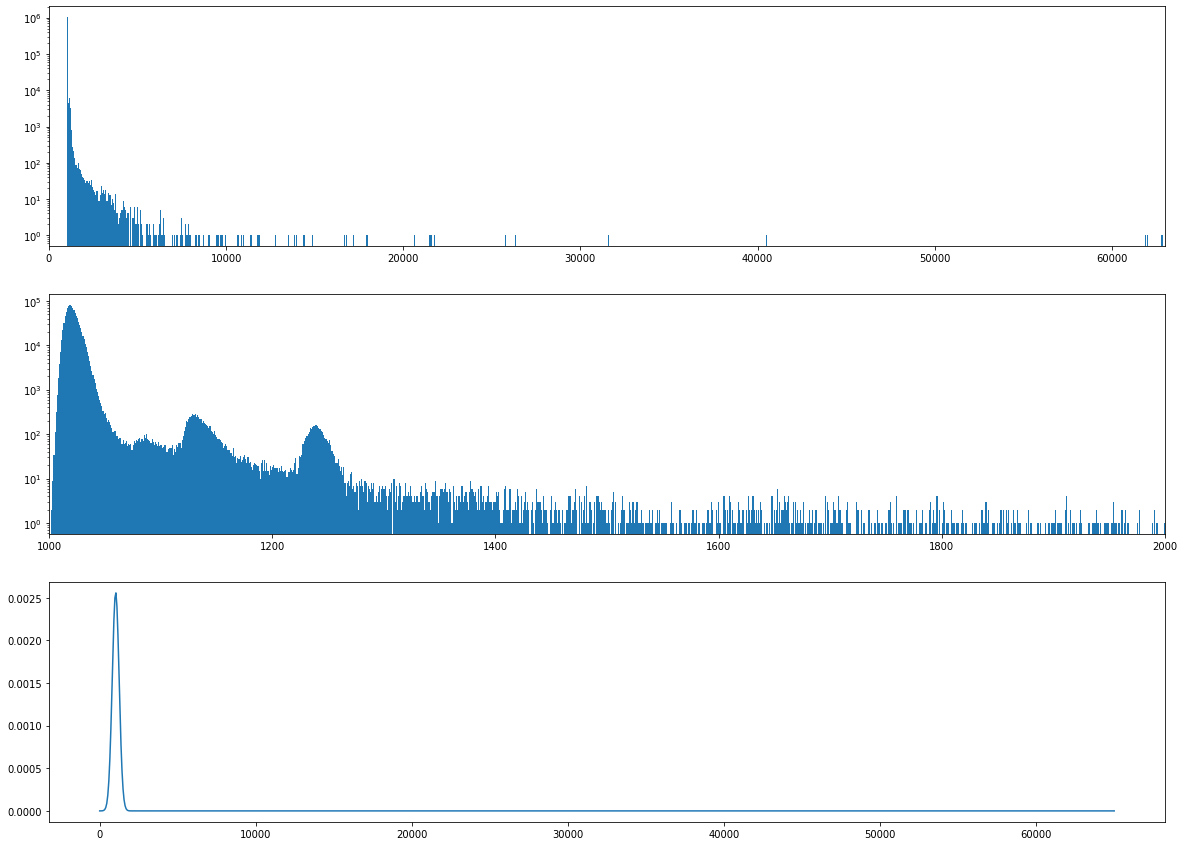

In [25]:
print(master_dark.min(), master_dark.max())

# Plot Histograms
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
hist1 = ax1.hist(master_dark.flatten(), bins=1000, log=True)
hist2 = ax2.hist(master_dark.flatten(), bins=1001, log=True, range=(1000, 2000))
ax1.set_xlim(0, 63000)
ax2.set_xlim(1000, 2000)

# Find statistics
mean1 = np.mean(master_dark.flatten())
median1 = np.median(master_dark.flatten())
mode1 = float(stats.mode(master_dark.flatten()).mode)
stddev1 = np.std(master_dark.flatten())
print(mean1, median1, mode1, stddev1)

# Define a gaussian with the same statistics
domain = np.linspace(0, 65000, 1000)
gaussian = np.exp(-1*pow((domain - mean1)/(2*stddev1), 2))/pow(2*stddev1*stddev1*np.pi, 0.5)
ax3.plot(domain, gaussian)

# Display plot
plt.show()

## 4.3: Imaging Flat Fields

## 4.4: Bad Pixel Map

## 4.6: Calibration Strategies